In [1]:
import numpy as np
import scipy.interpolate
import cv2
import requests
import matplotlib.pyplot as plt
import glob
from pysteps.utils import spectral


class Tweet(object):
    def __init__(self, s, embed_str=False):
        if not embed_str:
            # Use Twitter's oEmbed API
            # https://dev.twitter.com/web/embedded-tweets
            api = 'https://publish.twitter.com/oembed?url={}'.format(s)
            response = requests.get(api)
            self.text = response.json()["html"]
        else:
            self.text = s

    def _repr_html_(self):
        return self.text


def calc_mean_log_rapsd(x):
  spectra = []
  for k in range(num_examples):
    rapsd, frequencies = spectral.rapsd(x[k, ...], fft_method=np.fft, return_freq=True)
    spectra.append(rapsd)

  mean_log_rapsd = np.mean(np.array([np.log(s + 1e-30) for s in spectra]), axis=0)
  return mean_log_rapsd, frequencies


def resize_and_crop(image, smallest_side):
  height, width, num_channels = image.shape

  # Resize.
  if height <= width:
    new_height = smallest_side
    new_width = int(width * (new_height / height))
  else:
    new_width = smallest_side
    new_height = int(height * (new_width / width))

  image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

  # Centre crop.
  offset_h = (new_height - smallest_side) // 2
  offset_w = (new_width - smallest_side) // 2

  return image[offset_h:offset_h + smallest_side, offset_w:offset_w + smallest_side, :]


num_examples = 250
def calc_mean_log_rapsd(x):
  spectra = []
  for k in range(num_examples):
    rapsd, frequencies = spectral.rapsd(x[k, ...], fft_method=np.fft, return_freq=True)
    spectra.append(rapsd)

Pysteps configuration file found at: /mnt/traffic/home/shuaichao/.conda/envs/ssc/lib/python3.10/site-packages/pysteps/pystepsrc



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.839237914385133..4.512361456182588].


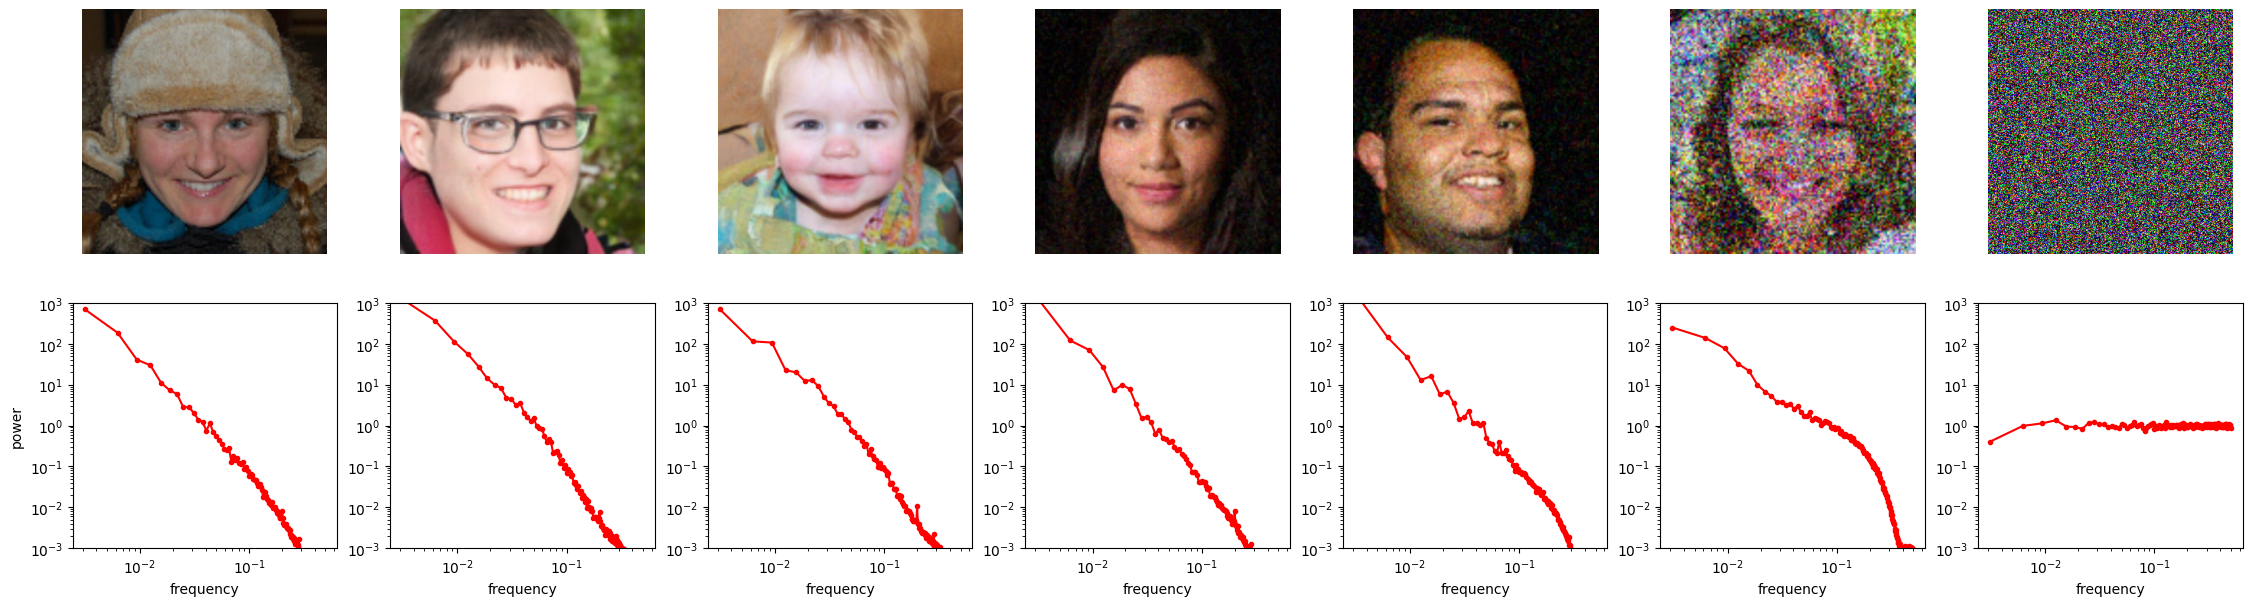

In [ ]:
roots = ["~/CoprGuard/Source/FFHQ", 
         "~/CoprGuard/Generated/FFHQ_DDIM_T_1000",
         "~/CoprGuard/Generated/FFHQ_DDIM_T_500",
         "~/CoprGuard/Generated/FFHQ_DDIM_T_100",
         "~/CoprGuard/Generated/FFHQ_DDIM_T_50",
         "~/CoprGuard/Generated/FFHQ_DDIM_T_10", 
         None]
num_displayed_examples = len(roots)

def show_rapsd_dir(root, k=0, frequencies=None):
    image_size = 320
    if root != None:
        images = []
        image_dirs = glob.glob(root + '/*.png')[0:1000]
        image_dirs.sort()
        for img_dir in image_dirs:
            arr = cv2.cvtColor(cv2.imread(img_dir), cv2.COLOR_BGR2RGB)
            arr = resize_and_crop(arr, image_size)
            images.append(arr)
        images = np.array(images)
        images = (images.astype(np.float32) / 255.0) * 2 - 1
        plt.subplot(2, num_displayed_examples, k)
        plt.imshow((images[0] + 1) / 2)
        plt.axis('off')
    else:
        images = np.random.normal(0, 1, size=(1000, image_size, image_size, 3))
        plt.subplot(2, num_displayed_examples, k)
        plt.imshow(images[0])
        plt.axis('off')
    rapsd, frequencies = spectral.rapsd(images[0, ..., 1], fft_method=np.fft, return_freq=True)
    plt.subplot(2, num_displayed_examples, num_displayed_examples + k)
    plt.plot(frequencies[1:], rapsd[1:], c='red', marker='o', markersize=3)  # Chop off the DC component.
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(10**-3, 10**3)
    plt.xlabel('frequency')
    if k == 1:
        plt.ylabel('power')
        
    return rapsd, frequencies

plt.figure(figsize=(28, 7))
for i in range(num_displayed_examples):
    if i == 0:
        rapsd, frequencies = show_rapsd_dir(roots[i], i + 1)
    else:
        show_rapsd_dir(roots[i], i + 1, frequencies)
# plt.savefig('results/single_rapsd_power.png')

In [ ]:
timesteps = 1000  
beta_start = 0.0001
beta_end = 0.02
betas = np.linspace(beta_start, beta_end, timesteps)
alphas = 1.0 - betas
alphas_cumprod = np.cumprod(alphas, axis=0)
print(alphas_cumprod)


[9.99900000e-01 9.99780092e-01 9.99640283e-01 9.99480581e-01
 9.99300994e-01 9.99101534e-01 9.98882212e-01 9.98643040e-01
 9.98384033e-01 9.98105205e-01 9.97806573e-01 9.97488153e-01
 9.97149966e-01 9.96792030e-01 9.96414367e-01 9.96016998e-01
 9.95599947e-01 9.95163238e-01 9.94706898e-01 9.94230952e-01
 9.93735429e-01 9.93220357e-01 9.92685768e-01 9.92131692e-01
 9.91558163e-01 9.90965213e-01 9.90352878e-01 9.89721193e-01
 9.89070197e-01 9.88399926e-01 9.87710420e-01 9.87001721e-01
 9.86273869e-01 9.85526907e-01 9.84760879e-01 9.83975831e-01
 9.83171807e-01 9.82348856e-01 9.81507025e-01 9.80646365e-01
 9.79766924e-01 9.78868755e-01 9.77951911e-01 9.77016445e-01
 9.76062411e-01 9.75089866e-01 9.74098866e-01 9.73089470e-01
 9.72061735e-01 9.71015723e-01 9.69951494e-01 9.68869109e-01
 9.67768633e-01 9.66650129e-01 9.65513662e-01 9.64359298e-01
 9.63187104e-01 9.61997149e-01 9.60789500e-01 9.59564229e-01
 9.58321406e-01 9.57061103e-01 9.55783393e-01 9.54488350e-01
 9.53176048e-01 9.518465

In [ ]:
def ddim_add_noise(x0, t, alphas_cumprod):
    sqrt_alpha_t = np.sqrt(alphas_cumprod[t])  
    sqrt_one_minus_alpha_t = np.sqrt(1 - alphas_cumprod[t]) 

    epsilon = np.random.normal(0, 1, x0.shape)

    xt = sqrt_alpha_t * x0 + sqrt_one_minus_alpha_t * epsilon
    return xt

x0 = np.random.random((128, 128, 3))
t = 100
print(ddim_add_noise(x0, t, alphas_cumprod))

[[[ 0.47932583  0.82721063  0.97743191]
  [-0.18786621  0.11923918  0.47252088]
  [ 1.83293052  0.72513876  0.79249627]
  ...
  [ 0.1117439   1.48939265  0.99782034]
  [ 0.20316125  0.02231673 -0.06603572]
  [ 0.73228184  0.61443171  0.2466953 ]]

 [[-0.01436482  1.20823051  1.00365258]
  [ 0.7877528  -0.03233039 -0.18032691]
  [ 0.74506109  1.38211046  0.51831008]
  ...
  [ 0.25715178  0.74373116 -0.20592192]
  [-0.03182827  0.68648677 -0.16424589]
  [ 0.84162281  0.91393875  1.14323785]]

 [[ 0.03770639  0.8386181   0.59921276]
  [ 0.66953112  0.6736024   0.77958033]
  [ 0.98676451  0.99714472  1.01786322]
  ...
  [ 0.65060064  0.28301622  0.75253056]
  [ 0.23061939  0.95576789 -0.44168493]
  [ 0.79612873 -0.02156164  0.48294832]]

 ...

 [[ 0.92577502  0.74830954  0.77730542]
  [ 0.64070579  1.3449502   0.860751  ]
  [ 0.72882898  0.17810358  0.49894745]
  ...
  [ 0.67948589  0.79293193  0.42750114]
  [ 0.79011632  0.42415963  0.15875059]
  [ 0.92550486  0.38966357  0.46961229]]

 [

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8375501702763293..2.7195959651158867].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8215437264666665..2.559398635746186].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.6310779938961644..1.511666656616254].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.3536607049375091..1.2881876113578434].


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.06741632349471505..1.0649495852600692].


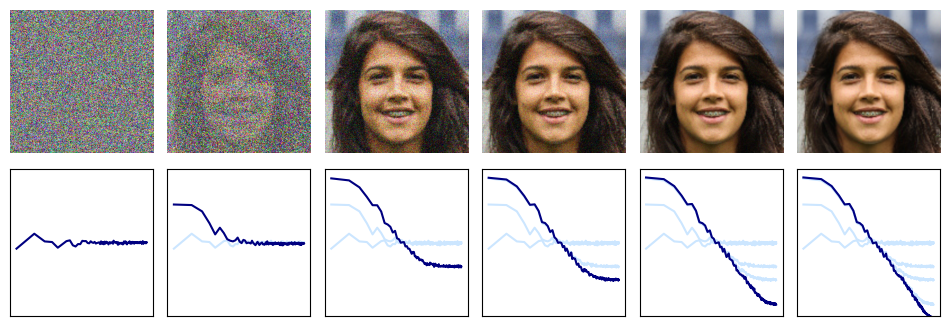

In [ ]:
from matplotlib.colors import to_rgb

image_dir = ''
image_size = 320
image = cv2.cvtColor(cv2.imread(image_dir), cv2.COLOR_BGR2RGB)
image = resize_and_crop(image, image_size)
image = (image.astype(np.float32) / 255.0) * 2 - 1
images = [image]
for t in [10, 50, 100, 500, 999]:
    images.append(ddim_add_noise(image, t, alphas_cumprod))
    
num_displayed_examples = len(images)
colors = ['#FDBB85', '#F46F43', '#403990', '#80A6E2', '#CF3D3E', '#FFEBAD', '#DCD7C1', '#BFB1D0', '#A7C0DE', '#6C91C2', '#A4514F', '#428B2C']

start_color = np.array([0.8, 0.9, 1.0])  # 浅蓝色
end_color = np.array([0.0, 0.0, 0.5])    # 深蓝色

def show_rapsd_single(k=0, frequencies=None):
    plt.subplot(2, num_displayed_examples, k + 1)
    plt.subplots_adjust(hspace=0.1, wspace=0.1)  # 调整高度和宽度间距
    plt.imshow((images[num_displayed_examples - k - 1] + 1) / 2)
    plt.axis('off')
    for j in range(k + 1):
        if j == k:
            c = end_color
        else:
            c = start_color
        rapsd, frequencies = spectral.rapsd(images[num_displayed_examples - j - 1][:,:, 1], fft_method=np.fft, return_freq=True)
        plt.subplot(2, num_displayed_examples, num_displayed_examples + k + 1)
        plt.plot(frequencies[1:], rapsd[1:], c=c, markersize=1)  # Chop off the DC component.
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(10**-3, 10**3)
    # plt.xlabel('frequency')
    plt.xticks([])
    plt.yticks([])
    plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

    # if k == 0:
        # plt.ylabel('power')
    # else:
    #     plt.axis('off')
        
    return rapsd, frequencies

plt.figure(figsize=(12, 4))
for i in range(num_displayed_examples):
    if i == 0:
        rapsd, frequencies = show_rapsd_single(i)
    else:
        show_rapsd_single(i, frequencies)
plt.savefig('results/single_rapsd_power.png')